## **Cluster Analysis of Time Series Data**

The K-Plane clustering algorithm is not available in any Python libraries so I derive it manually.

For K-Means algorithm, here is the link to scikit-learn library. 

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**1. Prepare Problem**

In [1]:
# a) Load libraries
import os

import pandas as pd
from pandas import DataFrame

from scipy.optimize import brute
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import numpy.polynomial.polynomial as npoly
import matplotlib as mpl
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans

In [2]:
# b) Load dataset
# List of files in the working folder
cwd = os.getcwd()
files = os.listdir(cwd)
print("List files in %r: %s" % (cwd, files))

data = pd.read_csv('Set1_C1C2_bar.csv').values
x = data[: , 0]
y = data[: , 1]

List files in 'D:\\PROJECTS\\GitHub_Projects\\2_k-plane_k-mean_regression_and_clustering': ['.ipynb_checkpoints', 'Clustering_analysis_V0.py', 'Clustering_analysis_V1.py', 'k-mean_and_k-plane_clustering.ipynb', 'k-mean_and_k-plane_clustering.py', 'K-plane data clustering.py', 'K-plane data clustering.txt', 'Set1_C1C2_bar.csv', 'Times_New_Roman.ttf', 'Untitled.ipynb', 'Untitled1.ipynb']


**2. Dataset summary**

(172, 2)
[[  0.5       138.5315863]
 [  1.        137.7883312]
 [  1.5       137.3973983]
 [  2.        137.0994687]
 [  2.5       136.8995967]
 [  3.        136.7653021]
 [  4.        136.7353021]
 [  5.        136.6672465]
 [  6.        136.4353021]
 [  7.        136.2263974]]


(array([133., 134., 135., 136., 137., 138., 139.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

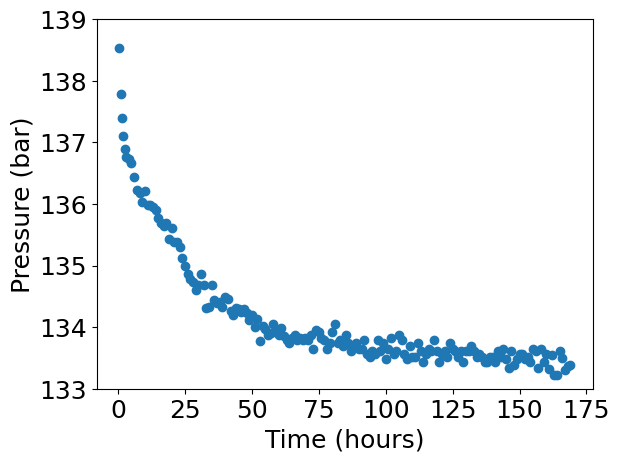

In [3]:

# data shape
print(data.shape)

# print first 10 rows of the dataset
print(data[0:10,:])

# Data visualizations
plt.scatter(x, y)
plt.ylim(133, 139)
plt.xlabel('Time (hours)', fontsize =18)
plt.ylabel('Pressure (bar)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

**3. Evaluate and compare algorithms**

In [4]:
# a) K-Plane clustering
# Create a piecewise function as a result of least square fit of data in a cluster  
def find_best_piecewise_polynomial(breakpoints, x, y):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    xs = np.split(x, breakpoints)
    ys = np.split(y, breakpoints)
    result = []
    for xi, yi in zip(xs, ys):
        if len(xi) < 2: continue
        coefs = npoly.polyfit(xi, yi, 1)
        f = npoly.Polynomial(coefs)
        result.append([f, xi, yi])
    return result

In [5]:
# create a function to calculate the sum of squares of the distances between each point and a nearest plane in a cluster (pressure decline region)
def f(breakpoints, x, y, fcache):
    breakpoints = tuple(map(int, sorted(breakpoints)))
    if breakpoints not in fcache:
        total_error = 0
        for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
            total_error += ((f(xi) - yi)**2).sum()
        fcache[breakpoints] = total_error
    return fcache[breakpoints]

In [6]:
# Decide number of breakpoints which is 2 or 3 clusters (3 regions in the pressure deline data)
num_breakpoints = 2
breakpoints = brute(f, [slice(1, len(x), 1)] * num_breakpoints, args=(x, y, {}), finish = None)

y = 138.72912874999997 - 0.7905683399999925 x**1, if x in [0.5, 2.5]
Breakpoint is: x = 2.5, y = 136.8995967
y = 136.7636453541745 - 0.0645921407410883 x**1, if x in [3.0, 42.0]
Breakpoint is: x = 42.0, y = 134.25900890000003
y = 134.24298603570497 - 0.005235369858455225 x**1, if x in [43.0, 169.0]
Breakpoint is: x = 169.0, y = 133.2150467


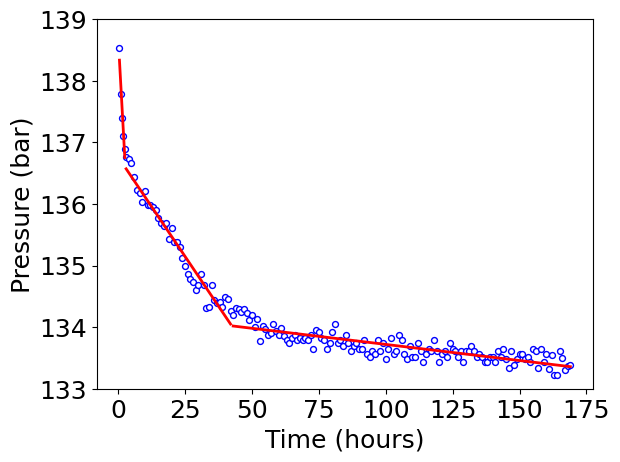

In [7]:
# Plot fitting curves (planes) and (x, y) of the breakpoints
plt.scatter(x, y, marker='o', c='white', edgecolors='blue', s=18)

for f, xi, yi, in find_best_piecewise_polynomial(breakpoints, x, y):
    x_interval = np.array([xi.min(), xi.max()])
    y_interval = np.array([yi.min(), yi.max()])
    
    linreg = linregress(y[0:xi.size], f(xi))
    
    print('y = {:35s}, if x in [{}, {}]'.format(str(f), * x_interval))
    print("Breakpoint is: x = %s, y = %s" % (x_interval[1], y_interval[0])) 
    
    plt.plot(x_interval, f(x_interval), 'r-', linewidth=2)
    plt.ylim(133, 139)
    plt.xlabel('Time (hours)', fontsize =18)
    plt.ylabel('Pressure (bar)', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

In [8]:
# b) K-Means algorithm
# Load model
model = KMeans(n_clusters=3)

# Fit the model to dataset
model.fit(data)

# Assign a cluster to each data point
y_hat = model.predict(data)

# Retrieve unique clusters
clusters = unique(y_hat)

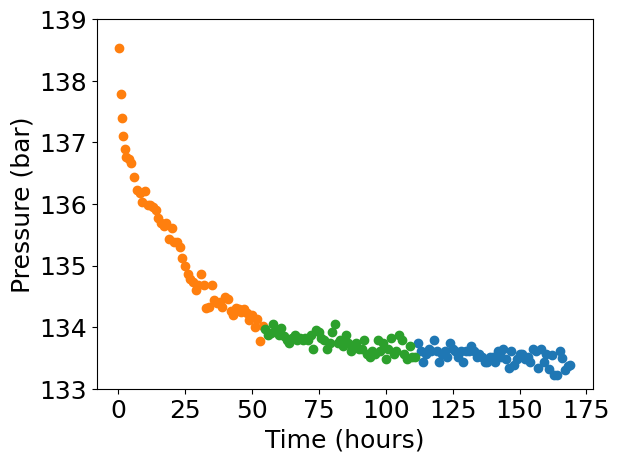

In [10]:
# Create scatter plot for data points from each cluster
for cluster in clusters:
    ix = where(y_hat == cluster)
    plt.scatter(data[ix, 0], data[ix, 1])
    plt.ylim(133, 139)
    plt.xlabel('Time (hours)', fontsize =18)
    plt.ylabel('Pressure (bar)', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

In [13]:
# Count the data points of each cluste
model.fit_predict(data)
print(model.labels_)

clusterCount = np.bincount(model.labels_)
print(clusterCount) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[58 57 57]


In [14]:
# List (x, y) of breakpoints
count = 0
for i in range(len(clusterCount)-1):
  count += clusterCount[i]
  print("Breakpoint %s is: x = %s y = %s" % (clusters[i+1], x[count], y[count])) 

Breakpoint 1 is: x = 56.0 y = 133.8721337
Breakpoint 2 is: x = 113.0 y = 133.6084529


**4. Conclusions**

- We started with the problem statement, derived K-Plane clustering method stepwise and used K-Means algorithm in scikit-learn library to determine (x, y) of breakpoints.

- It can be seen from the cluster analysis of the two algorithms that K-Plane method provided accurate (x, y) of the two brekapoints as expected.